# COMP550 Final Project: 
## The Effectiveness of English Extractive Text Summarization Methods Across Languages

Nakiya Noorbhai, Kira Noël, and Luca Garnier-Landurie

## Datasets

We use the datasets cnn_dailymail (https://huggingface.co/datasets/cnn_dailymail) and mlsum (https://huggingface.co/datasets/mlsum) from huggingface. We will use the training split as our dev set and the validation and test sets as our test set.

In [5]:
from datasets import load_dataset, concatenate_datasets

# English
en_dev = load_dataset('cnn_dailymail', '3.0.0', split='train')
en_test = concatenate_datasets([load_dataset('cnn_dailymail', '3.0.0', split='validation'), load_dataset('cnn_dailymail', '3.0.0', split='test')])

# German
de_dev = load_dataset('mlsum', 'de', split='train')
de_test = concatenate_datasets([load_dataset('mlsum', 'de', split='validation'), load_dataset('mlsum', 'de', split='test')])

# Spanish
es_dev = load_dataset('mlsum', 'es', split='train')
es_test = concatenate_datasets([load_dataset('mlsum', 'es', split='validation'), load_dataset('mlsum', 'es', split='test')])

# French
fr_dev = load_dataset('mlsum', 'fr', split='train')
fr_test = concatenate_datasets([load_dataset('mlsum', 'fr', split='validation'), load_dataset('mlsum', 'fr', split='test')])

# Russian
ru_dev = load_dataset('mlsum', 'ru', split='train')
ru_test = concatenate_datasets([load_dataset('mlsum', 'ru', split='validation'), load_dataset('mlsum', 'ru', split='test')])

# Turkish
tu_dev = load_dataset('mlsum', 'tu', split='train')
tu_test = concatenate_datasets([load_dataset('mlsum', 'tu', split='validation'), load_dataset('mlsum', 'tu', split='test')])

Reusing dataset cnn_dailymail (/home/ke-noel/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset cnn_dailymail (/home/ke-noel/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset cnn_dailymail (/home/ke-noel/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset mlsum (/home/ke-noel/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/home/ke-noel/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/home/ke-noel/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/home/ke-noel/.cache/huggingface/datasets/ml

## Data Exploration

In [6]:
dev_sets = (en_dev, de_dev, es_dev, fr_dev, ru_dev, tu_dev)
test_sets = (en_test, de_test, es_test, fr_test, ru_test, tu_test)
languages = ('english', 'german', 'french', 'spanish', 'russian', 'turkish')

In [7]:
def print_stats(language, dev, test):
    '''
    Get the average summary and article lengths, and the average ratio.
    Also collect dataset sizes.
    '''

    summary_wcs_dev = []
    article_wcs_dev = []
    summary_article_wc_ratios_dev = []
    for e in dev:
        try:
            article_wcs_dev.append(len(e['text'].split()))
            summary_wcs_dev.append(len(e['summary'].split()))
        except:
            article_wcs_dev.append(len(e['article'].split()))
            summary_wcs_dev.append(len(e['highlights'].split()))
        summary_article_wc_ratios_dev.append(article_wcs_dev[-1] / summary_wcs_dev[-1])
    len_dev = len(summary_wcs_dev)
    avg_summary_wc_dev = sum(summary_wcs_dev) / len_dev
    avg_article_wc_dev = sum(article_wcs_dev) / len_dev
    avg_ratio_dev = sum(summary_article_wc_ratios_dev) / len_dev
    
    summary_wcs_test = []
    article_wcs_test = []
    summary_article_wc_ratios_test = []
    for e in test:
        try:
            article_wcs_test.append(len(e['text'].split()))
            summary_wcs_test.append(len(e['summary'].split()))
        except:
            article_wcs_test.append(len(e['article'].split()))
            summary_wcs_test.append(len(e['highlights'].split()))
        summary_article_wc_ratios_test.append(article_wcs_test[-1] / summary_wcs_test[-1])
    len_test = len(summary_wcs_test)
    avg_summary_wc_test = sum(summary_wcs_test) / len_test
    avg_article_wc_test = sum(article_wcs_test) / len_test
    avg_ratio_test = sum(summary_article_wc_ratios_test) / len_test

    print('--- ' + language + ' ---')
    print('Dev set - num entries: %d, avg summary wc: %.2f, avg article wc: %.2f, avg ratio: %.2f'
            %(len_dev, avg_summary_wc_dev, avg_article_wc_dev, avg_ratio_dev))
    print('Test set - num entries: %d, avg summary wc: %.2f, avg article wc: %.2f, avg ratio: %.2f'
            %(len_test, avg_summary_wc_test, avg_article_wc_test, avg_ratio_test))
    print()
    return (language, len_dev, avg_summary_wc_dev, avg_article_wc_dev, avg_ratio_dev, len_test, avg_summary_wc_test,
            avg_article_wc_test, avg_ratio_test)

stats = []
for l, dev, test in zip(languages, dev_sets, test_sets):
    stats.append(print_stats(l, dev, test))

--- english ---
Dev set - num entries: 287113, avg summary wc: 51.57, avg article wc: 691.87, avg ratio: 14.80
Test set - num entries: 24858, avg summary wc: 56.57, avg article wc: 679.49, avg ratio: 13.06

--- german ---
Dev set - num entries: 220887, avg summary wc: 27.19, avg article wc: 486.35, avg ratio: 19.73
Test set - num entries: 22095, avg summary wc: 23.19, avg article wc: 556.41, avg ratio: 25.34

--- french ---
Dev set - num entries: 266367, avg summary wc: 19.26, avg article wc: 697.74, avg ratio: 38.46
Test set - num entries: 24278, avg summary wc: 21.81, avg article wc: 768.14, avg ratio: 37.12

--- spanish ---
Dev set - num entries: 392902, avg summary wc: 24.84, avg article wc: 520.96, avg ratio: 22.90
Test set - num entries: 31887, avg summary wc: 27.29, avg article wc: 613.41, avg ratio: 24.06

--- russian ---
Dev set - num entries: 25556, avg summary wc: 12.83, avg article wc: 779.53, avg ratio: 63.43
Test set - num entries: 1507, avg summary wc: 11.93, avg article

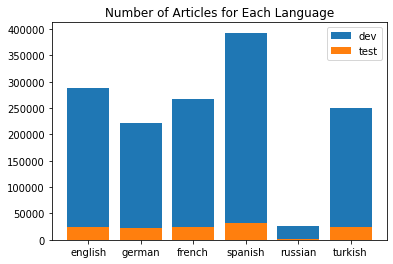

<AxesSubplot:xlabel='language'>

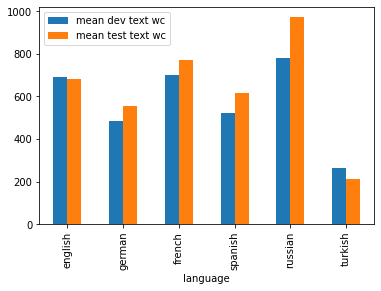

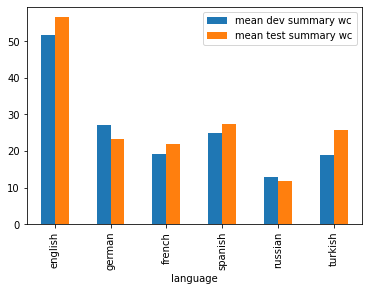

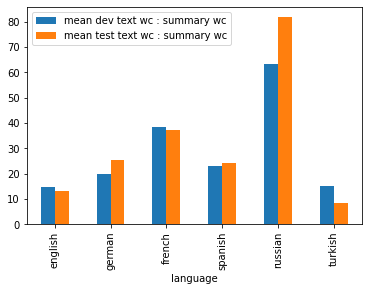

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

columns = ['language', 'number of dev articles', 'mean dev summary wc', 'mean dev text wc', 'mean dev text wc : summary wc', 
           'number of test articles', 'mean test summary wc', 'mean test text wc', 'mean test text wc : summary wc']
df = pd.DataFrame(stats, columns=columns)

# Plot the relative sizes
len_dev = [s[1] for s in stats]
len_test = [s[5] for s in stats]
plt.figure()
plt.title('Number of Articles for Each Language')
plt.bar(languages, len_dev, label='dev')
plt.bar(languages, len_test, label='test')
plt.legend(loc='upper right')
plt.show()

df.plot(x='language', y=['mean dev text wc', 'mean test text wc'], kind='bar')
df.plot(x='language', y=['mean dev summary wc', 'mean test summary wc'], kind='bar')
df.plot(x='language', y=['mean dev text wc : summary wc', 'mean test text wc : summary wc'], kind='bar')

## Implementation

In [40]:
from lexrank import LexRank
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.kl import KLSummarizer

from nltk.tokenize import sent_tokenize

lexrank_sum = LexRank
lsa_sum = LsaSummarizer
luhn_sum = LuhnSummarizer
kl_sum = KLSummarizer

#### Metrics

In [35]:
from rouge import Rouge

rouge = Rouge()

## Experiment

#### Determining the English Baseline Hyperparameters

In [42]:
import numpy as np
rouge_scores = {}

##### Lex Rank Summarizer

In [61]:
scores = []
count = 0

for e in dev_sets[languages.index('english')]:
    documents = [e['article']]
    model = lexrank_sum(documents)
    sentences = sent_tokenize(e['article'])
    hypothesis = ' '.join(model.get_summary(sentences, summary_size=len(e['highlights'].split('.'))))
    reference = e['highlights']
    scores.append(rouge.get_scores(hypothesis, reference))
    count += 1
    if count % 10000 == 0:
        print(count)
    if count == 30000:
        break

# Compute overall statistics
r1_f1s = np.array([s[0]['rouge-1']['f'] for s in scores])
r2_f1s = np.array([s[0]['rouge-2']['f'] for s in scores])

rouge_scores['lexrank'] = {
    'r1-f1': {'mean': np.mean(r1_f1s), 'std': np.std(r1_f1s)},
    'r2-f1': {'mean': np.mean(r2_f1s), 'std': np.std(r2_f1s)},
}

print(rouge_scores)


10000
20000
30000
{'lexrank': {'r1-f1': {'mean': 0.21535421108392666, 'std': 0.08092975335955623}, 'r2-f1': {'mean': 0.057397417849551206, 'std': 0.06040022099180157}}}


##### LSA Summarizer

##### Luhn Summarizer

##### KL Summarizer

#### Applying the English Baseline Parameters to Other Languages

##### French

In [62]:
scores = []
french_rouge_scores = {}
count = 0

for e in dev_sets[languages.index('french')]:
    documents = [e['text']]
    model = lexrank_sum(documents)
    sentences = sent_tokenize(e['text'])
    hypothesis = ' '.join(model.get_summary(sentences, summary_size=len(e['summary'].split('.'))))
    reference = e['summary']
    scores.append(rouge.get_scores(hypothesis, reference))
    count += 1
    if count % 10000 == 0:
        print(count)
    if count == 30000:
        break

# Compute overall statistics
r1_f1s = np.array([s[0]['rouge-1']['f'] for s in scores])
r2_f1s = np.array([s[0]['rouge-2']['f'] for s in scores])

french_rouge_scores['lexrank'] = {
    'r1-f1': {'mean': np.mean(r1_f1s), 'std': np.std(r1_f1s)},
    'r2-f1': {'mean': np.mean(r2_f1s), 'std': np.std(r2_f1s)},
}

print(french_rouge_scores)

10000
20000
30000
{'lexrank': {'r1-f1': {'mean': 0.21535421108392666, 'std': 0.08092975335955623}, 'r2-f1': {'mean': 0.057397417849551206, 'std': 0.06040022099180157}}}


In [64]:
print(french_rouge_scores)

{'lexrank': {'r1-f1': {'mean': 0.15225277092590572, 'std': 0.08270595909027906}, 'r2-f1': {'mean': 0.018954151616348842, 'std': 0.05220546666176688}}}


##### Turkish

In [66]:
scores = []
turkish_rouge_scores = {}
count = 0

for e in dev_sets[languages.index('turkish')]:
    documents = [e['text']]
    model = lexrank_sum(documents)
    sentences = sent_tokenize(e['text'])
    hypothesis = ' '.join(model.get_summary(sentences, summary_size=len(e['summary'].split('.'))))
    reference = e['summary']

    try:
        scores.append(rouge.get_scores(hypothesis, reference))
    except:
        print(f'err: 0 len {hypothesis} or {reference} for article {e["text"]}')
        
    count += 1
    if count % 10000 == 0:
        print(count)
    if count == 30000:
        break

# Compute overall statistics
r1_f1s = np.array([s[0]['rouge-1']['f'] for s in scores])
r2_f1s = np.array([s[0]['rouge-2']['f'] for s in scores])

turkish_rouge_scores['lexrank'] = {
    'r1-f1': {'mean': np.mean(r1_f1s), 'std': np.std(r1_f1s)},
    'r2-f1': {'mean': np.mean(r2_f1s), 'std': np.std(r2_f1s)},
}

print(turkish_rouge_scores)

10000
20000
err: 0 len . or Başbakan Recep Tayyip Erdoğan'ın 'En az 3 çocuk' fikrinin bir benzeri de İran Cumhurbaşkanı Mahmud Ahmedinejad'tan geldi for article . İran Cumhurbaşkanı Mahmud Ahmedinejad, "bir ya da iki çocuğun yeterli olacağı" düşüncesinin bir milletin yok oluşu anlamına geldiğini söyledi. Devlet televizyonunun haberine göre, Ahmedinejad, çocuk sayısı ve aile kurumunun önemine ilişkin yaptığı açıklamada, "Bir ya da iki çocuk yeterli sloganı, bir milletin varlığını sürdürmesi değil, onun yok oluşu demektir" ifadesini kullandı. Birçok bilimadamı ve seçkin insanın çok çocuklu aileden geldiğini anlatan Ahmedinejad, kalabalık ailede çocukların yeteneklerini geliştirme imkanı bulduklarını kaydetti. "Çok çocuğun eğitilip terbiye edilemeyeceği" düşüncesini doğru bulmadıklarını belirten Ahmedinejad, ''Ailenin en önemli görevi gelecek nesli terbiye etmektir'' açıklamasında bulundu. "Aileler beş ya da altı çocuk sahibi olsun demiyoruz" ifadesini kullanan Ahmedinejad, çocuk sayısınd

In [ ]:
print(turkish_rouge_scores)

#### Tuning the Hyperparameters in Other Languages

## Analysis (aka plots)

#